# NBA Performance Analysis (2022-2023)
---

### Table of Content
- Data Wrangling
- Data Visualization
- Data Analysis

## Data Wrangling
---
Transforming raw data from three different sources into a standardized format suitable for analysis <br>
1. Flat File
2. API
3. Website
4. Data Merging

### 1. Flat File

In [5]:
#setup
import pandas as pd

#importing and loading the flat file (ff)
ff = pd.read_csv('2022-2023 NBA Player Stats.csv', encoding='ISO-8859-1', delimiter=';')
ff.head(3)

#creating a copy of the original df to perform data cleaning/transformation tasks on the copy
ff_copy = ff.copy()

In [6]:
#displaying dataframe information
ff.info()

#result:
    #null values: 0
    #data types: consistent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      553 non-null    int64  
 1   Player  553 non-null    object 
 2   Pos     553 non-null    object 
 3   Age     553 non-null    int64  
 4   Tm      553 non-null    object 
 5   G       553 non-null    int64  
 6   GS      553 non-null    int64  
 7   MP      553 non-null    float64
 8   FG      553 non-null    float64
 9   FGA     553 non-null    float64
 10  FG%     553 non-null    float64
 11  3P      553 non-null    float64
 12  3PA     553 non-null    float64
 13  3P%     553 non-null    float64
 14  2P      553 non-null    float64
 15  2PA     553 non-null    float64
 16  2P%     553 non-null    float64
 17  eFG%    553 non-null    float64
 18  FT      553 non-null    float64
 19  FTA     553 non-null    float64
 20  FT%     553 non-null    float64
 21  ORB     553 non-null    float64
 22  DR

#### Data Cleaning/Transformation #1:
Creating necessary columns to prep data for data visualization/analysis procedures
- **Unique ID**: Necessary to handle duplicate player names resulting from mid-season trades in the 'Player' column
- **PER**: Player Efficiency Rating (PER) Calculation = (1 / MP) * (PTS + 0.42 * AST + 0.5 * TRB + 0.12 * STL + 0.12 * BLK - 0.72 * TOV)

In [8]:
#concatenating values from 'Player' & 'Tm' columns to create 'Unique_ID' column
ff_copy['Unique_ID'] = ff_copy['Player'] + '_' + ff_copy['Tm']

#calculating the Player Efficiency Rating to create 'PER' column 
ff_copy['PER'] = (1 / ff_copy['MP']) * (ff_copy['PTS'] + 0.42 * ff_copy['AST'] + 0.5 * ff_copy['TRB'] + 0.12 * ff_copy['STL'] + 0.12 * ff_copy['BLK'] - 0.72 * ff_copy['TOV'])
ff_copy.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unique_ID,PER
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,4.3,6.4,1.1,0.7,0.7,1.2,2.2,10.4,Precious Achiuwa_TOR,0.581130
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,Steven Adams_MEM,0.525481
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,7.3,10.1,3.3,1.2,0.8,2.6,2.8,21.6,Bam Adebayo_MIA,0.747989


#### Data Cleaning/Transformation #2:
Binning players based on three performance metrics: 
- Points Per Game
- Rebounds Per Game
- Assists Per Game

The players were categorized into three tiers: Low, Med, and High

In [10]:
#defining a function to categorize players into tiers based on their POINTS PER GAME stat

#conditions:
    #Low_Tier: 0-10 
    #Med_Tier: 10.1-20 
    #High_Tier: 20.1 or higher
def pts_category(pts):
    if pts <= 10:
        return 'Low_Tier'
    elif pts <= 20:
        return 'Med_Tier'
    else:
        return 'High_Tier'
    
#applying the function to the 'PTS' column and creating a new column 'PTS_Tier'    
ff_copy['PTS_Tier'] = ff_copy['PTS'].apply(pts_category)

In [11]:
#defining a function to categorize players into tiers based on their REBOUNDS PER GAME stat

#conditions:
    #Low_Tier: 0-5 
    #Med_Tier: 5.1-10 
    #High_Tier: 10.1 or higher
def trb_category(trb):
    if trb <= 5:
        return 'Low_Tier'
    elif trb <= 10:
        return 'Med_Tier'
    else:
        return 'High_Tier'
    
#applying the function to the 'TRB' column and creating a new column 'TRB_Tier'    
ff_copy['TRB_Tier'] = ff_copy['TRB'].apply(trb_category)

In [12]:
#defining a function to categorize players based on their ASSISTS PER GAME stat 

#conditions:
    #Low_Tier: 0-4 
    #Med_Tier: 4.1-8 
    #High_Tier: 8.1 or higher
def ast_category(ast):
    if ast <= 5:
        return 'Low_Tier'
    elif ast <= 10:
        return 'Med_Tier'
    else:
        return 'High_Tier'
    
#applying the function to the 'AST' column and creating a new column 'AST_Tier'    
ff_copy['AST_Tier'] = ff_copy['AST'].apply(ast_category)

In [13]:
#loading dataframe with newly added columns (PTS_Tier, TRB_Tier, AST_Tier)
ff_copy.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Unique_ID,PER,PTS_Tier,TRB_Tier,AST_Tier
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,0.7,0.7,1.2,2.2,10.4,Precious Achiuwa_TOR,0.581130,Med_Tier,Med_Tier,Low_Tier
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.9,1.1,1.9,2.3,8.6,Steven Adams_MEM,0.525481,Low_Tier,High_Tier,Low_Tier
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,1.2,0.8,2.6,2.8,21.6,Bam Adebayo_MIA,0.747989,High_Tier,High_Tier,Low_Tier


### 2. API
---

In [14]:
#setup
import pandas as pd
import requests

#making a GET request to the API endpoint at 'Free NBA API Doc' 
url = "https://free-nba.p.rapidapi.com/teams"
headers = {
    "X-RapidAPI-Key": "ab01361aa0mshb1a477c479c4fe7p1c32c8jsn4c6ad2415b40",
    "X-RapidAPI-Host": "free-nba.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers)
response

#status code 200: request successful

<Response [200]>

In [15]:
#converting the json data into Python object via json()
data = response.json()

#displaying the keys (headers) for each dictionary in dataset
for team in data["data"]:
    print(team.keys())

dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abbreviation', 'city', 'conference', 'division', 'full_name', 'name'])
dict_keys(['id', 'abb

In [19]:
#converting the API data to pandas dataframe
    
#creating an empty list to store dictionaries
team_list = []

#creating a list of dictionaries containing: team_name, team_city, team_conference, team_division
    #starting a loop that will iterate through each team's data
for team in data["data"]:
    team_dict = {
        "Full_Name": team["full_name"],
        "Team_City": team["city"],
        "Team_Conference": team["conference"],
        "Team_Division": team["division"]
    }
    #adding 'team_dict' dictionary object to the 'team_list' list object
    team_list.append(team_dict)

#creating a df from 'team_list'
api = pd.DataFrame(team_list)
api.head(3)

#creating a copy of the original df to perform data cleaning/transformation tasks on
api_copy = api.copy()

In [20]:
#displaying dataframe information
api.info()

#key findings
    #null values: 0
    #data types: consistent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Full_Name        30 non-null     object
 1   Team_City        30 non-null     object
 2   Team_Conference  30 non-null     object
 3   Team_Division    30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


#### Data Cleaning/Transformation #1:
Creating necessary columns to prep data for data visualization/analysis procedures
- **City_Abbrev**: Needed to link with other data sources 
- **Team_Name**: Needed to link with other data sources

In [43]:
#creating a dictionary that contains the Team City name (key) and its corresponding City Abbreviation (value)
city_dict = {
    'Atlanta': 'ATL',
    'Boston': 'BOS',
    'Brooklyn': 'BRK',
    'Chicago': 'CHI',
    'Charlotte': 'CHO',
    'Cleveland': 'CLE',
    'Dallas': 'DAL',
    'Denver': 'DEN',
    'Detroit': 'DET',
    'Golden State': 'GSW',
    'Houston': 'HOU',
    'Indiana': 'IND',
    'LA': 'LAC',
    'Los Angeles': 'LAL',
    'Memphis': 'MEM',
    'Miami': 'MIA',
    'Milwaukee': 'MIL',
    'Minnesota': 'MIN',
    'New Orleans': 'NOP',
    'New York': 'NYK',
    'Oklahoma City': 'OKC',
    'Orlando': 'ORL',
    'Philadelphia': 'PHI',
    'Phoenix': 'PHO',
    'Portland': 'POR',
    'Sacramento': 'SAC',
    'San Antonio': 'SAS',
    'Toronto': 'TOR',
    'Utah': 'UTA',
    'Washington': 'WAS'
}

#mapping the values of the 'Team_City' column to their corresponding values in the 'city_dict' dictionary to create 'City Abbrev' column
api_copy['City_Abbrev'] = api_copy['Team_City'].map(city_dict)

#extracting the last word from each string in 'Full_Name' column to create 'Team_Name' column
api_copy['Team_Name'] = api_copy['Full_Name'].str.split().str[-1]

#removing whitespaces to ensure a smooth merging process
api_copy['Team_Name'] = api_copy['Team_Name'].str.strip()
api_copy.head(3)

,Full_Name,Team_City,Team_Conference,Team_Division,City_Abbrev,Team_Name
0,Atlanta Hawks,Atlanta,East,Southeast,ATL,Hawks
1,Boston Celtics,Boston,East,Atlantic,BOS,Celtics
2,Brooklyn Nets,Brooklyn,East,Atlantic,BRK,Nets


### 3. Website
---

#### Introductory Phase:
Extracting 2 tables from the Conference Standings section
- Eastern Conference table
- Western Conference table

In [64]:
#setup
import pandas as pd

#creating a url object for the link that I will be scraping from
url = 'https://www.basketball-reference.com/leagues/NBA_2023.html'

#reading in EASTERN html table from url
web_eastern = pd.read_html(url, attrs={'id': 'confs_standings_E'})[0]
#renaming df columns to match the columns from the web
web_eastern.columns = ['Full_Name', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

#reading in WESTERN html table from url
web_western = pd.read_html(url, attrs={'id': 'confs_standings_W'})[0]
#renaming df columns to match the columns from the web
web_western.columns = ['Full_Name', 'W', 'L', 'W/L%', 'GB', 'PS/G', 'PA/G', 'SRS']

#creating a copy of the original df to perform data cleaning/transformation tasks on
web_eastern_copy = web_eastern.copy()
web_western_copy = web_western.copy()

print("Eastern Conference Data:")
print(web_eastern.head(3))
print("\nWestern Conference Data:")
print(web_western.head(3))

Eastern Conference Data:
             Full_Name   W   L   W/L%   GB   PS/G   PA/G   SRS
0     Milwaukee Bucks*  58  24  0.707    —  116.9  113.3  3.61
1      Boston Celtics*  57  25  0.695  1.0  117.9  111.4  6.38
2  Philadelphia 76ers*  54  28  0.659  4.0  115.2  110.9  4.37

Western Conference Data:
            Full_Name   W   L   W/L%   GB   PS/G   PA/G   SRS
0     Denver Nuggets*  53  29  0.646    —  115.8  112.5  3.04
1  Memphis Grizzlies*  51  31  0.622  2.0  116.9  113.0  3.60
2   Sacramento Kings*  48  34  0.585  5.0  120.7  118.1  2.30


In [66]:
#displaying dataframe information
print("Eastern Conference Data:")
print(web_eastern.info())
print("\nWestern Conference Data:")
print(web_western.info())

#result:
    #null values: 0
    #data types: consistent

Eastern Conference Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Full_Name  15 non-null     object 
 1   W          15 non-null     int32  
 2   L          15 non-null     int32  
 3   W/L%       15 non-null     float64
 4   GB         15 non-null     object 
 5   PS/G       15 non-null     float64
 6   PA/G       15 non-null     float64
 7   SRS        15 non-null     float64
dtypes: float64(4), int32(2), object(2)
memory usage: 968.0+ bytes
None

Western Conference Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Full_Name  15 non-null     object 
 1   W          15 non-null     int64  
 2   L          15 non-null     int64  
 3   W/L%       15 non-null     float64
 4   GB         15 non-null     o

#### Data Cleaning/Transformation #1:
Creating necessary columns and merging dataframes to prep data for data visualization/analysis procedures
- **Conference**: Required for data analysis
- **Standing**: Required for data analysis
- **Table_Label**: Needed to link with other data sources

In [57]:
#setting value as 'Eastern' to create 'Conference' column
web_eastern_copy['Conference'] = 'Eastern'
web_western_copy['Conference'] = 'Western'

#inputting sequence of # from 1-16 to create 'Standing' column
web_eastern_copy['Standing'] = range(1, 16)
web_western_copy['Standing'] = range(1, 16)

#extracting the last word from each string in 'Full_Name' column to create 'Team_Label' column
web_eastern_copy['Team_Label'] = web_eastern_copy['Full_Name'].str.split(' ').str[-1]
web_western_copy['Team_Label'] = web_western_copy['Full_Name'].str.split(' ').str[-1]

#removing whitespaces to ensure a smooth merging process
web_eastern_copy['Team_Label'] = web_eastern_copy['Team_Label'].str.strip()
web_western_copy['Team_Label'] = web_western_copy['Team_Label'].str.strip()

#concatenating the two dataframes
web_copy = pd.concat([web_eastern_copy, web_western_copy], axis=0)
#reseting index
web_copy = web_copy.reset_index(drop=True)
web_copy.iloc[[0,1,15,16], :]

,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference,Standing,Team_Label
0,Milwaukee Bucks*,58,24,0.707,—,116.9,113.3,3.61,Eastern,1,Bucks*
1,Boston Celtics*,57,25,0.695,1.0,117.9,111.4,6.38,Eastern,2,Celtics*
15,Denver Nuggets*,53,29,0.646,—,115.8,112.5,3.04,Western,1,Nuggets*
16,Memphis Grizzlies*,51,31,0.622,2.0,116.9,113.0,3.60,Western,2,Grizzlies*


#### Data Cleaning/Transformation #2:
Removing excess characters (*)

In [60]:
#replacing '*' with an empty string
web_copy['Full_Name'] = web_copy['Full_Name'].str.replace('*', '')
web_copy['Team_Label'] = web_copy['Team_Label'].str.replace('*', '')
web_copy.head(3)

C:\Users\josep\AppData\Local\Temp\ipykernel_22664\2061574314.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  web_copy['Full_Name'] = web_copy['Full_Name'].str.replace('*', '')
C:\Users\josep\AppData\Local\Temp\ipykernel_22664\2061574314.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  web_copy['Team_Label'] = web_copy['Team_Label'].str.replace('*', '')


,Full_Name,W,L,W/L%,GB,PS/G,PA/G,SRS,Conference,Standing,Team_Label
0,Milwaukee Bucks,58,24,0.707,—,116.9,113.3,3.61,Eastern,1,Bucks
1,Boston Celtics,57,25,0.695,1.0,117.9,111.4,6.38,Eastern,2,Celtics
2,Philadelphia 76ers,54,28,0.659,4.0,115.2,110.9,4.37,Eastern,3,76ers


### 4. Data Merging
---

#### Merging Process #1:
Joining dataframes **ff_copy** & **api_copy**

In [81]:
#performing left join operation
merged_df = pd.merge(ff_copy, api_copy[['Full_Name', 'Team_City', 'Team_Conference', 'Team_Division', 'Team_Name','City_Abbrev']], 
                         left_on='Tm', right_on='City_Abbrev', how='left')
merged_df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PER,PTS_Tier,TRB_Tier,AST_Tier,Full_Name,Team_City,Team_Conference,Team_Division,Team_Name,City_Abbrev
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,0.581130,Med_Tier,Med_Tier,Low_Tier,Toronto Raptors,Toronto,East,Atlantic,Raptors,TOR
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.525481,Low_Tier,High_Tier,Low_Tier,Memphis Grizzlies,Memphis,West,Southwest,Grizzlies,MEM
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,0.747989,High_Tier,High_Tier,Low_Tier,Miami Heat,Miami,East,Southeast,Heat,MIA


#### Merging Process #2:
Joining dataframes **merged_df** & **web_copy**

In [82]:
#performing left join operation
merged_df = pd.merge(merged_df, web_copy[['W', 'L', 'Standing', 'Team_Label']],
                         left_on='Team_Name', right_on='Team_Label', how='left')
merged_df.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Full_Name,Team_City,Team_Conference,Team_Division,Team_Name,City_Abbrev,W,L,Standing,Team_Label
0,1,Precious Achiuwa,C,23,TOR,33,9,23.0,4.0,8.2,...,Toronto Raptors,Toronto,East,Atlantic,Raptors,TOR,41.0,41.0,9.0,Raptors
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,Memphis Grizzlies,Memphis,West,Southwest,Grizzlies,MEM,51.0,31.0,2.0,Grizzlies
2,3,Bam Adebayo,C,25,MIA,52,52,35.3,8.6,15.7,...,Miami Heat,Miami,East,Southeast,Heat,MIA,44.0,38.0,7.0,Heat


#### Data Cleaning/Transformation #1:
Ensuring data type consistency across columns <br>
Handling null or missing values

In [67]:
#displaying dataframe information
merged_df.info()

#result:
    #null values: 24
    #data types: incompatible

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 552
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               553 non-null    int64  
 1   Player           553 non-null    object 
 2   Pos              553 non-null    object 
 3   Age              553 non-null    int64  
 4   Tm               553 non-null    object 
 5   G                553 non-null    int64  
 6   GS               553 non-null    int64  
 7   MP               553 non-null    float64
 8   FG               553 non-null    float64
 9   FGA              553 non-null    float64
 10  FG%              553 non-null    float64
 11  3P               553 non-null    float64
 12  3PA              553 non-null    float64
 13  3P%              553 non-null    float64
 14  2P               553 non-null    float64
 15  2PA              553 non-null    float64
 16  2P%              553 non-null    float64
 17  eFG%            

In [70]:
#identifying rows with null values in specific columns
null_rows = merged_df[merged_df[['Full_Name', 'Team_City', 'Team_Conference', 'Team_Division', 'Team_Name', 'City_Abbrev', 'W', 'L', 'Standing', 'Team_Label']].isnull().any(axis=1)]
null_rows.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Full_Name,Team_City,Team_Conference,Team_Division,Team_Name,City_Abbrev,W,L,Standing,Team_Label
5,6,Nickeil Alexander-Walker,SG,24,TOT,37,3,14.3,2.2,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,36,Malik Beasley,SG,26,TOT,56,13,26.6,4.8,12.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,57,Mikal Bridges,SF,26,TOT,57,57,36.4,6.4,13.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Null Value Findings**:

- 24 rows with incomplete joins were identified during the merging of 'ff_final' and 'api_final' due to 'TOT' values in the 'Tm' column
- 'TOT' represents players who played for multiple teams in the 22-23 season
- These 24 rows with null values were removed from the dataset as they are unnecessary

In [71]:
#removing rows with null values
merged_df = merged_df.dropna()

In [75]:
#changing data types from float to integer for 3 columns
merged_df['W'] = merged_df['W'].astype(int)
merged_df['L'] = merged_df['L'].astype(int)
merged_df['Standing'] = merged_df['Standing'].astype(int)

C:\Users\josep\AppData\Local\Temp\ipykernel_22664\82367967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['W'] = merged_df['W'].astype(int)
C:\Users\josep\AppData\Local\Temp\ipykernel_22664\82367967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['L'] = merged_df['L'].astype(int)
C:\Users\josep\AppData\Local\Temp\ipykernel_22664\82367967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [76]:
#displaying dataframe information
merged_df.info()

#result:
    #null values: 0
    #data types: consistent

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 552
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               528 non-null    int64  
 1   Player           528 non-null    object 
 2   Pos              528 non-null    object 
 3   Age              528 non-null    int64  
 4   Tm               528 non-null    object 
 5   G                528 non-null    int64  
 6   GS               528 non-null    int64  
 7   MP               528 non-null    float64
 8   FG               528 non-null    float64
 9   FGA              528 non-null    float64
 10  FG%              528 non-null    float64
 11  3P               528 non-null    float64
 12  3PA              528 non-null    float64
 13  3P%              528 non-null    float64
 14  2P               528 non-null    float64
 15  2PA              528 non-null    float64
 16  2P%              528 non-null    float64
 17  eFG%            

## Data Visualization
---
1. Scatter Plot - Points per Game vs. Minutes Played
2. Box Plot - Minutes Played by Position
3. Pie Chart - Distribution of Positions
4. Player Count by Points / Rebound / Assist Tier

In [85]:
#setup
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Scatter Plot - Points per Game vs. Minutes Played
---
Visualizing the relationship between points scored and playing time using a scatter plot

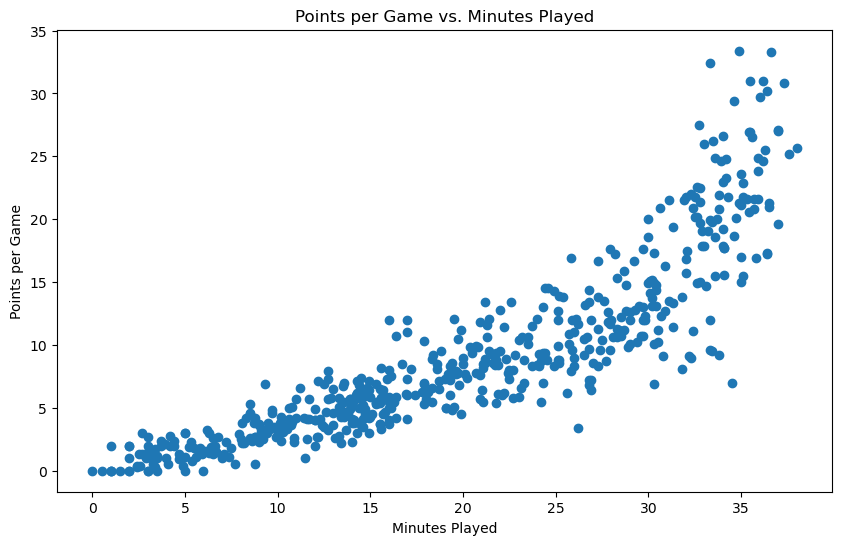

In [86]:
#creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['MP'], merged_df['PTS'])
plt.xlabel('Minutes Played')
plt.ylabel('Points per Game')
plt.title('Points per Game vs. Minutes Played')
plt.show()

#### Insight:
The scatter plot reveals a positive correlation between minutes played and points scored, suggesting that more playing time corresponds to higher point totals

### 2. Box Plot - Minutes Played by Position
---
Creating a box plot to compare the distribution of minutes played for each position

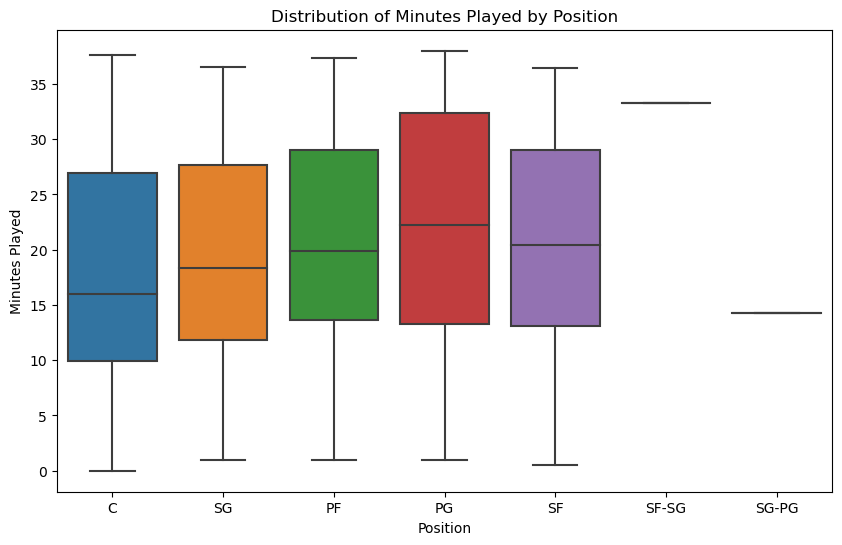

In [87]:
#creating a box plot:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pos', y='MP', data=merged_df)
plt.xlabel('Position')
plt.ylabel('Minutes Played')
plt.title('Distribution of Minutes Played by Position')
plt.show()

#### Insight: 
The chart illustrates a shift in the NBA from a center-dominated league in the 90s-2000s to a small-ball style where point guards play a crucial role in controlling the game

### 3. Pie Chart - Distribution of Positions
---
Creating a pie chart to show the distribution of players across different positions in the NBA

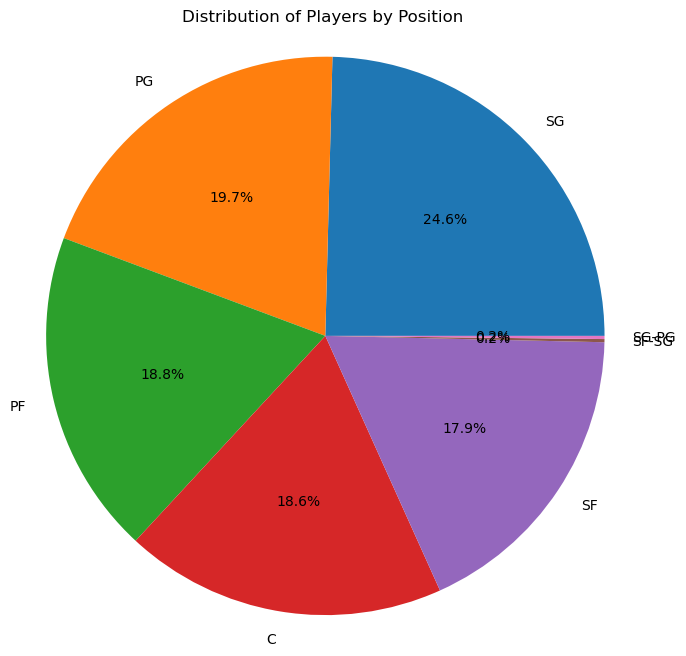

In [88]:
#calculating the count of players in each position
position_counts = merged_df['Pos'].value_counts()

#creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Players by Position')
plt.axis('equal')
plt.show()

#### Insight: 
Similar to our box chart insight, the chart highlights that shooting guards and point guards hold the highest representation among the top positions, reflecting a preference for guard-oriented play styles that prioritize scoring and playmaking abilities.
- Despite shooting guards ranking first in terms of player distribution, they rank fourth in terms of minutes played. This suggests that while shooting guards may be numerous in the league, they may not receive as much playing time as other positions.

### 5. Player Count by Points / Rebound / Assist Tier
---
Creating 3 bar graphs to visualize the distribution of players across different stats and tiers

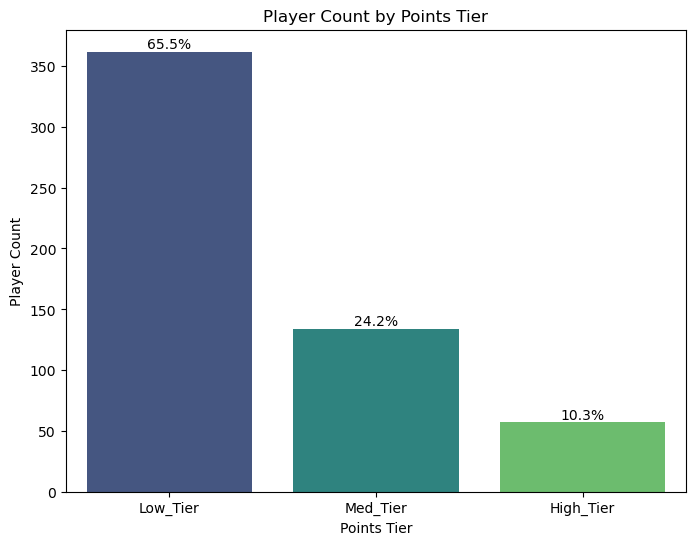

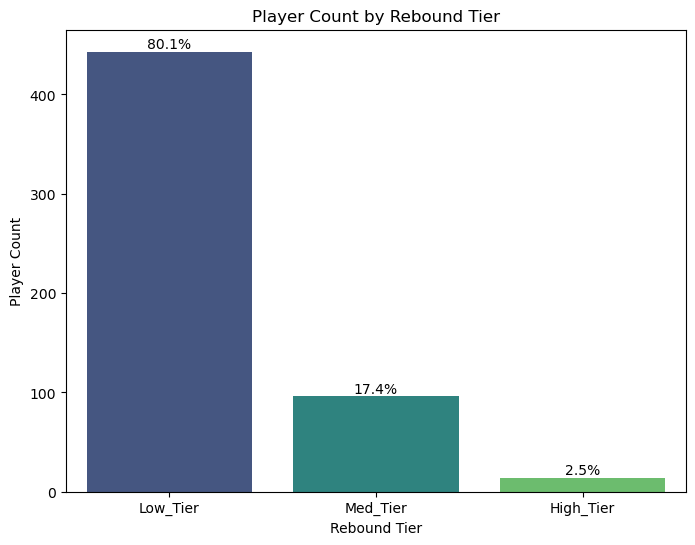

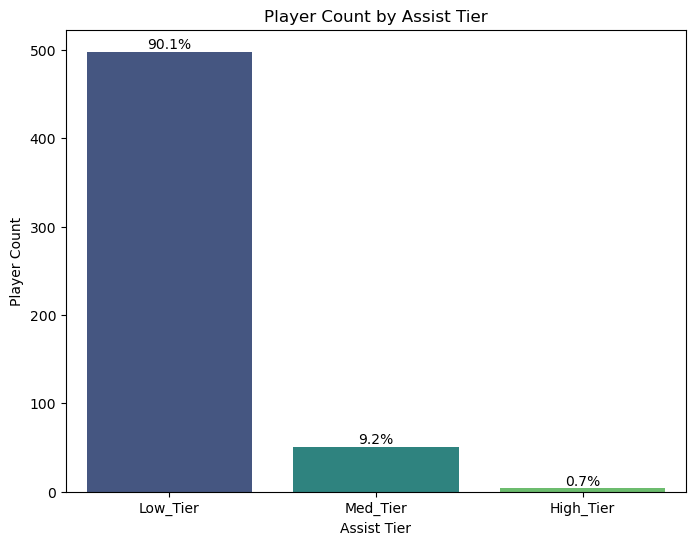

In [90]:
#counting the number of players in each points tier
tier_counts = merged_df['PTS_Tier'].value_counts()
#counting the total number of players in the league
total_players = merged_df['Unique_ID'].nunique()
#calculating percentage per tier count
percentage = (tier_counts / total_players) * 100
#creating a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('Points Tier')
plt.ylabel('Player Count')
plt.title('Player Count by Points Tier')
#adding percentage text on each bar
for i, count in enumerate(tier_counts):
    percentage_text = f'{percentage[i]:.1f}%'
    ax.text(i, count, percentage_text, ha='center', va='bottom')
plt.show()

#counting the number of players in each rebound tier
tier_counts = merged_df['TRB_Tier'].value_counts()
#counting the total number of players in the league
total_players = merged_df['Unique_ID'].nunique()
#calculating percentage per tier count
percentage = (tier_counts / total_players) * 100
#creating a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('Rebound Tier')
plt.ylabel('Player Count')
plt.title('Player Count by Rebound Tier')
#adding percentage text on each bar
for i, count in enumerate(tier_counts):
    percentage_text = f'{percentage[i]:.1f}%'
    ax.text(i, count, percentage_text, ha='center', va='bottom')
plt.show()

#counting the number of players in each Assist tier
tier_counts = merged_df['AST_Tier'].value_counts()
#counting the total number of players in the league
total_players = merged_df['Unique_ID'].nunique()
#calculating percentage per tier count
percentage = (tier_counts / total_players) * 100
#creating a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='viridis')
plt.xlabel('Assist Tier')
plt.ylabel('Player Count')
plt.title('Player Count by Assist Tier')
#adding percentage text on each bar
for i, count in enumerate(tier_counts):
    percentage_text = f'{percentage[i]:.1f}%'
    ax.text(i, count, percentage_text, ha='center', va='bottom')
plt.show()

**Insight**:
Becoming an all-around player in the NBA is a significant challenge, as it requires excelling in multiple categories. Achieving high-tier percentiles in points, rebounds, and assists is crucial. The overall likelihood of being an all-around player is incredibly low, at just 0.0022%.
- % of being an all-around player formula = Points high-tier percentile * Rebound high-tier percentile * Assist high-tier percentile

## Data Analysis
---
1. Team PER Analysis
2. Player PER Analysis

### 1. Team PER Analysis
---
- Analyzing the avg PER values for each team to assess team performance and identify teams with the highest-performing players
- Comparing the avg PER values to team win-loss records to assess the relationship between player efficiency and team success

**Note**: Filtering out players with fewer than or equal to 10 games from the analysis to ensure a more accurate representation of the average PER.

In [94]:
#filtering players with more than 10 games
filtered_df = merged_df[merged_df['G'] > 10]

#calculating avg PER for each team
team_per_avg = filtered_df.groupby('Team_Name')['PER'].mean().reset_index()
team_per_avg = team_per_avg.rename(columns={'Team_Name': 'Team_Label'})

#calculating total wins and losses for each team
team_wins = web_copy.groupby('Team_Label')['W'].sum().reset_index()
team_losses = web_copy.groupby('Team_Label')['L'].sum().reset_index()

#merging average PER, wins, and losses dataframes
team_stats = pd.merge(team_per_avg, team_wins, on='Team_Label')
team_stats = pd.merge(team_stats, team_losses, on='Team_Label')

#calculating win percentage
team_stats['Win_%'] = team_stats['W'] / (team_stats['W'] + team_stats['L'])

#sorting teams based on average PER in descending order
team_stats = team_stats.sort_values('PER', ascending=False)
print('Top 5 Team by PER')
print(team_stats.head())

#sorting teams based on average Win_% in descending order
team_stats = team_stats.sort_values('Win_%', ascending=False)
print('\nTop 5 Team by WIN_%')
print(team_stats.head())

Top 5 Team by PER
      Team_Label       PER     W     L     Win_%
20      Pelicans  0.566039  42.0  40.0  0.512195
28      Warriors  0.564801  44.0  38.0  0.536585
25          Suns  0.560464  45.0  37.0  0.548780
27  Timberwolves  0.551126  42.0  40.0  0.512195
7      Grizzlies  0.548955  51.0  31.0  0.621951

Top 5 Team by WIN_%
   Team_Label       PER     W     L     Win_%
2       Bucks  0.510638  58.0  24.0  0.707317
5     Celtics  0.512310  57.0  25.0  0.695122
0       76ers  0.526617  54.0  28.0  0.658537
18    Nuggets  0.526003  53.0  29.0  0.646341
4   Cavaliers  0.495800  51.0  31.0  0.621951


#### Analysis:
Taking our two rankings into consideration, it looks like there is no direct correlation between player efficiency (PER) and team success (win-loss records). <br> This suggests:
- Individual PER does not directly translate to team success
- Team success is not solely dependent on individual PER
- Overall NBA sucess is influenced by other factors beyond PER, such as team chemistry, coaching strategies, and overall roster depth

### 2. Player PER Analysis
---
- Ranking players based on their PER values to identify the top performers in terms of overall efficiency

**Note**: Filtering out players with fewer than or equal to 10 games from the analysis to ensure a more accurate representation of the average PER.

In [97]:
#filtering out players with less than or equal to 10 games
filtered_players = merged_df[merged_df['G'] > 10]

#ranking players based on PER values
ranked_players = filtered_players.sort_values('PER', ascending=False).reset_index(drop=True)

#creating a new column 'Rank' with player rankings
ranked_players['Rank'] = ranked_players.index + 1

#selecting the desired columns
ranked_players = ranked_players[['Rank', 'Player', 'PER', 'Pos', 'Age', 'Tm', 'Team_Conference', 'Full_Name', 'PTS_Tier', 'TRB_Tier', 'AST_Tier']]
ranked_players.head(10)

,Rank,Player,PER,Pos,Age,Tm,Team_Conference,Full_Name,PTS_Tier,TRB_Tier,AST_Tier
0,1,Giannis Antetokounmpo,1.145045,PF,28,MIL,East,Milwaukee Bucks,High_Tier,High_Tier,Med_Tier
1,2,Joel Embiid,1.086304,C,28,PHI,East,Philadelphia 76ers,High_Tier,High_Tier,Low_Tier
2,3,Luka Don?i?,1.059290,PG,23,DAL,West,Dallas Mavericks,High_Tier,Med_Tier,Med_Tier
3,4,LeBron James,0.970824,PF,38,LAL,West,Los Angeles Lakers,High_Tier,Med_Tier,Med_Tier
4,5,Nikola Joki?,0.966964,C,27,DEN,West,Denver Nuggets,High_Tier,High_Tier,High_Tier
5,6,Ja Morant,0.963303,PG,23,MEM,West,Memphis Grizzlies,High_Tier,Med_Tier,Med_Tier
6,7,Anthony Davis,0.959701,C,29,LAL,West,Los Angeles Lakers,High_Tier,High_Tier,Low_Tier
7,8,Stephen Curry,0.956705,PG,34,GSW,West,Golden State Warriors,High_Tier,Med_Tier,Med_Tier
8,9,Shai Gilgeous-Alexander,0.956113,PG,24,OKC,West,Oklahoma City Thunder,High_Tier,Low_Tier,Med_Tier
9,10,Jayson Tatum,0.941501,PF,24,BOS,East,Boston Celtics,High_Tier,Med_Tier,Low_Tier


#### Analysis:

- Top performers span across positions, highlighting that player efficiency transcends specific roles and instead relies on individual skills and playing styles

- The rankings span from 23 to 38 year old players, highlighting that both young talents and experienced veterans can excel in the league

- All top performers have logged in 'High_Tier' in the 'PTS_Tier' column, indicating that being a proficient scorer is a key characteristic of a franchise player

- The Western Conference excels in producing top performers, showcasing superior player development compared to the Eastern Conference